In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("results.csv")  
k_value_list=[1,3,5,10,15,20,50]

In [4]:
df['dataset'].unique()

array(['cora', 'pubmed', 'amazon-computers', 'amazon-photo',
       'amazon-history', 'ogbn-arxiv'], dtype=object)

In [5]:
def get_final_acc(df):
    
    for k in k_value_list:
        df[str(k)]=[float(i.split('/')[0].split("±")[0]) for i in df[str(k)]]
    return df    
    
df=get_final_acc(df)


([<matplotlib.axis.XTick at 0x7f8c7cb0ef50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

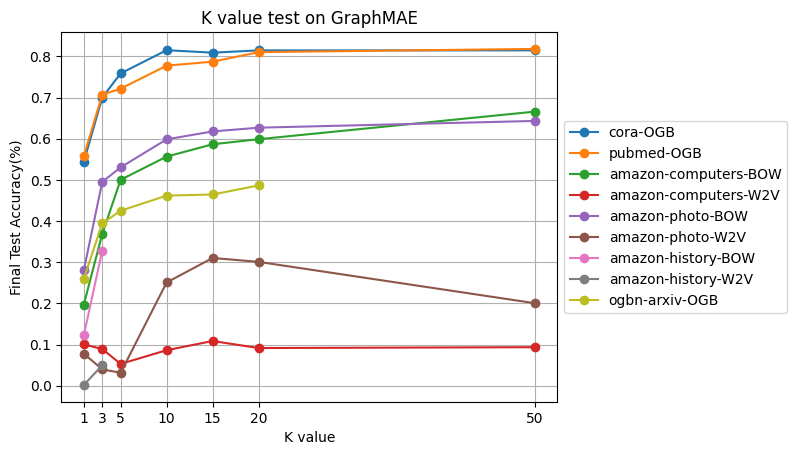

In [6]:

fig, ax = plt.subplots()

method='GraphMAE'
x=k_value_list

for dataset in df['dataset'].unique():
    for feature_type in df['feature_type'].unique():
        row=df[(df.method==method) & (df.dataset==dataset) &(df.feature_type==feature_type)]
        
        for i in range(len(row)):
            y=row.loc[:,'1':'50'].to_numpy()[0]
            y[y == 0] = np.nan
            ax.plot(x,y,'-o',label=f"{dataset.lower()}-{feature_type.upper()}")
            
ax.legend()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()
ax.set_ylabel("Final Test Accuracy(%)")
ax.set_xlabel("K value")
ax.set_title(f'K value test on {method}')
plt.xticks(k_value_list)